In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datacleaner import autoclean

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

/Users/user/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv("cancer_reg.csv")
df.head()

avg_ann_count  avg_deaths_peryear  target_deathrate  incidence_rate  \
0         1397.0                 469             164.9           489.8   
1          173.0                  70             161.3           411.6   
2          102.0                  50             174.7           349.7   
3          427.0                 202             194.8           430.4   
4           57.0                  26             144.4           350.1   

   med_income  popest2015  poverty_percent  study_percap           binnedinc  \
0       61898      260131             11.2    499.748204   (61494.5, 125635]   
1       48127       43269             18.6     23.111234  (48021.6, 51046.4]   
2       49348       21026             14.6     47.560164  (48021.6, 51046.4]   
3       44243       75882             17.1    342.637253    (42724.4, 45201]   
4       49955       10321             12.5      0.000000  (48021.6, 51046.4]   

   median_age  ...  pctprivatecoveragealone  pctempprivcoverage  \
0        39.3  ...                      NaN                41.6   
1        33.0  ...                     53.8                43.6   
2        45.0  ...                     43.5                34.9   
3        42.8  ...                     40.3                35.0   
4        48.3  ...                     43.9                35.1   

  pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0              32.9                    14.0  81.780529  2.594728  4.821857   
1              31.1                    15.3  89.228509  0.969102  2.246233   
2              42.1                    21.1  90.922190  0.739673  0.465898   
3              45.3                    25.0  91.744686  0.782626  1.161359   
4              44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  pctmarriedhouseholds  birthrate  
0      1.843479             52.856076   6.118831  
1      3.741352             45.372500   4.333096  
2      2.747358             54.444868   3.729488  
3      1.362643             51.021514   4.603841  
4      0.492135             54.027460   6.796657  

[5 rows x 33 columns]

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_ann_count            3047 non-null   float64
 1   avg_deaths_peryear       3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidence_rate           3047 non-null   float64
 4   med_income               3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   poverty_percent          3047 non-null   float64
 7   study_percap             3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   median_age               3047 non-null   float64
 10  median_age_male          3047 non-null   float64
 11  median_age_female        3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percent_married          3047 non-null   float64
 14  pctnohs18_24            

avg_ann_count  avg_deaths_peryear  target_deathrate  incidence_rate  \
0         1397.0                 469             164.9           489.8   
1          173.0                  70             161.3           411.6   
2          102.0                  50             174.7           349.7   
3          427.0                 202             194.8           430.4   
4           57.0                  26             144.4           350.1   

   med_income  popest2015  poverty_percent  study_percap           binnedinc  \
0       61898      260131             11.2    499.748204   (61494.5, 125635]   
1       48127       43269             18.6     23.111234  (48021.6, 51046.4]   
2       49348       21026             14.6     47.560164  (48021.6, 51046.4]   
3       44243       75882             17.1    342.637253    (42724.4, 45201]   
4       49955       10321             12.5      0.000000  (48021.6, 51046.4]   

   median_age  ...  pctprivatecoveragealone  pctempprivcoverage  \
0        39.3  ...                      NaN                41.6   
1        33.0  ...                     53.8                43.6   
2        45.0  ...                     43.5                34.9   
3        42.8  ...                     40.3                35.0   
4        48.3  ...                     43.9                35.1   

  pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0              32.9                    14.0  81.780529  2.594728  4.821857   
1              31.1                    15.3  89.228509  0.969102  2.246233   
2              42.1                    21.1  90.922190  0.739673  0.465898   
3              45.3                    25.0  91.744686  0.782626  1.161359   
4              44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  pctmarriedhouseholds  birthrate  
0      1.843479             52.856076   6.118831  
1      3.741352             45.372500   4.333096  
2      2.747358             54.444868   3.729488  
3      1.362643             51.021514   4.603841  
4      0.492135             54.027460   6.796657  

[5 rows x 33 columns]

Using a New Library for Data Preprocessing

In [4]:
df.isnull().sum()

avg_ann_count                 0
avg_deaths_peryear            0
target_deathrate              0
incidence_rate                0
med_income                    0
popest2015                    0
poverty_percent               0
study_percap                  0
binnedinc                     0
median_age                    0
median_age_male               0
median_age_female             0
geography                     0
percent_married               0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [5]:
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(df[col].mean(), inplace=True)

In [6]:
df.isnull().sum()

avg_ann_count              0
avg_deaths_peryear         0
target_deathrate           0
incidence_rate             0
med_income                 0
popest2015                 0
poverty_percent            0
study_percap               0
binnedinc                  0
median_age                 0
median_age_male            0
median_age_female          0
geography                  0
percent_married            0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_ann_count            3047 non-null   float64
 1   avg_deaths_peryear       3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidence_rate           3047 non-null   float64
 4   med_income               3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   poverty_percent          3047 non-null   float64
 7   study_percap             3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   median_age               3047 non-null   float64
 10  median_age_male          3047 non-null   float64
 11  median_age_female        3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percent_married          3047 non-null   float64
 14  pctnohs18_24            

avg_ann_count  avg_deaths_peryear  target_deathrate  incidence_rate  \
0         1397.0                 469             164.9           489.8   
1          173.0                  70             161.3           411.6   
2          102.0                  50             174.7           349.7   
3          427.0                 202             194.8           430.4   
4           57.0                  26             144.4           350.1   

   med_income  popest2015  poverty_percent  study_percap           binnedinc  \
0       61898      260131             11.2    499.748204   (61494.5, 125635]   
1       48127       43269             18.6     23.111234  (48021.6, 51046.4]   
2       49348       21026             14.6     47.560164  (48021.6, 51046.4]   
3       44243       75882             17.1    342.637253    (42724.4, 45201]   
4       49955       10321             12.5      0.000000  (48021.6, 51046.4]   

   median_age  ...  pctprivatecoveragealone  pctempprivcoverage  \
0        39.3  ...                48.453774                41.6   
1        33.0  ...                53.800000                43.6   
2        45.0  ...                43.500000                34.9   
3        42.8  ...                40.300000                35.0   
4        48.3  ...                43.900000                35.1   

  pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0              32.9                    14.0  81.780529  2.594728  4.821857   
1              31.1                    15.3  89.228509  0.969102  2.246233   
2              42.1                    21.1  90.922190  0.739673  0.465898   
3              45.3                    25.0  91.744686  0.782626  1.161359   
4              44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  pctmarriedhouseholds  birthrate  
0      1.843479             52.856076   6.118831  
1      3.741352             45.372500   4.333096  
2      2.747358             54.444868   3.729488  
3      1.362643             51.021514   4.603841  
4      0.492135             54.027460   6.796657  

[5 rows x 33 columns]

In [8]:
df.nunique()
df.value_counts()

avg_ann_count  avg_deaths_peryear  target_deathrate  incidence_rate  med_income  popest2015  poverty_percent  study_percap  binnedinc           median_age  median_age_male  median_age_female  geography                       percent_married  pctnohs18_24  pcths18_24  pctsomecol18_24  pctbachdeg18_24  pcths25_over  pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone  pctwhite    pctblack   pctasian   pctotherrace  pctmarriedhouseholds  birthrate
6.0            3                   214.4             373.3           43859       1130        11.7             0.000000      (42724.4, 45201]    51.2        53.0             49.6               Wibaux County, Montana          56.5             18.7          28.0        53.300000        0.0              37.4          16.4               54.7                3.0                   68.1                45.200000                36.2           

In [9]:
cat_col = df.select_dtypes(include='object')
le = LabelEncoder()

for col in cat_col:
  df[col] = le.fit_transform(df[col])


Scaling

In [10]:
scaler =  StandardScaler()
num_col = df.select_dtypes(include='number').columns
df[num_col] = scaler.fit_transform(df[num_col])
df.head()

avg_ann_count  avg_deaths_peryear  target_deathrate  incidence_rate  \
0       0.558328            0.561518         -0.496057        0.761321   
1      -0.306003           -0.230067         -0.625801       -0.672179   
2      -0.356140           -0.269746         -0.142865       -1.806881   
3      -0.126640            0.031811          0.581539       -0.327553   
4      -0.387917           -0.317360         -1.234876       -1.799549   

   med_income  popest2015  poverty_percent  study_percap  binnedinc  \
0    1.232312    0.478696        -0.886102      0.650277   1.218383   
1    0.088363   -0.180448         0.268698     -0.249816   0.173418   
2    0.189790   -0.248055        -0.355519     -0.203646   0.173418   
3   -0.234279   -0.081322         0.034617      0.353585  -0.523226   
4    0.240214   -0.280592        -0.683232     -0.293460   0.173418   

   median_age  ...  pctprivatecoveragealone  pctempprivcoverage  \
0   -0.131848  ...                 0.000000            0.042734   
1   -0.270930  ...                 0.592879            0.254461   
2   -0.006012  ...                -0.549357           -0.666550   
3   -0.054580  ...                -0.904226           -0.655964   
4    0.066840  ...                -0.504998           -0.645377   

   pctpubliccoverage  pctpubliccoveragealone  pctwhite  pctblack  pctasian  \
0          -0.427608               -0.857336 -0.113862 -0.448196  1.367088   
1          -0.657187               -0.644641  0.340912 -0.560060  0.380201   
2           0.745793                0.304306  0.444328 -0.575848 -0.301959   
3           1.153933                0.942391  0.494549 -0.572892 -0.035483   
4           0.988126                0.566084  0.638610 -0.608154 -0.225352   

   pctotherrace  pctmarriedhouseholds  birthrate  
0     -0.039818              0.245324   0.241011  
1      0.499790             -0.893428  -0.658382  
2      0.217176              0.487085  -0.962391  
3     -0.176530             -0.033835  -0.522020  
4     -0.424035              0.423570   0.582401  

[5 rows x 33 columns]

In [11]:
x = df.drop(columns=['target_deathrate'])
y = df['target_deathrate']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)

In [13]:
mse_lr = mean_squared_error(y_val, y_pred)
r2_lr = r2_score(y_val, y_pred)
print(f'MSE: {mse_lr}, R2: {r2_lr}')

MSE: 0.519243483390356, R2: 0.5217746550908352


# Random Forest

In [14]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)

In [15]:
mse_rf = mean_squared_error(y_val, y_pred)
r2_rf = r2_score(y_val, y_pred)
print(f'MSE: {mse_rf}, R2: {r2_rf}')

MSE: 0.47452832808182493, R2: 0.5629574936899153


# Decision Tree

In [16]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_val)

In [17]:
mse_dt = mean_squared_error(y_val, y_pred)
r2_dt = r2_score(y_val, y_pred)
print(f'MSE: {mse_dt}, R2: {r2_dt}')

MSE: 0.6799037878646977, R2: 0.37380586592320497


# LGBM 

In [18]:
lgb = LGBMRegressor(n_estimators=100, max_depth=10, random_state=42)
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_val)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7593
[LightGBM] [Info] Number of data points in the train set: 2437, number of used features: 32
[LightGBM] [Info] Start training from score -0.002001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [19]:
mse_lgb = mean_squared_error(y_val, y_pred)
r2_lgb = r2_score(y_val, y_pred)
print(f'MSE: {mse_lgb}, R2: {r2_lgb}')

MSE: 0.3331770336219763, R2: 0.6931426066643606


In [21]:
from tabulate import tabulate
data = [
  ['LinearRegression', '', mse_lr, r2_lr],
  ['RandomForestRegressor', '', mse_rf, r2_rf],
  ['DecisionTreeRegressor', '', mse_dt, r2_dt],
  ['LGBMRegressor', '', mse_lgb, r2_lgb]
]

headers = ['Model', 'MSE', 'R2-Score']
table = tabulate(data, headers=headers, tablefmt='grid')
print(table)

+-----------------------+---------+----------+------------+
|                       | Model   |      MSE |   R2-Score |
+=======================+=========+==========+============+
| LinearRegression      |         | 0.519243 |   0.521775 |
+-----------------------+---------+----------+------------+
| RandomForestRegressor |         | 0.474528 |   0.562957 |
+-----------------------+---------+----------+------------+
| DecisionTreeRegressor |         | 0.679904 |   0.373806 |
+-----------------------+---------+----------+------------+
| LGBMRegressor         |         | 0.333177 |   0.693143 |
+-----------------------+---------+----------+------------+


# Shap Value

In [22]:
import shap
shap.initjs()

In [23]:
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

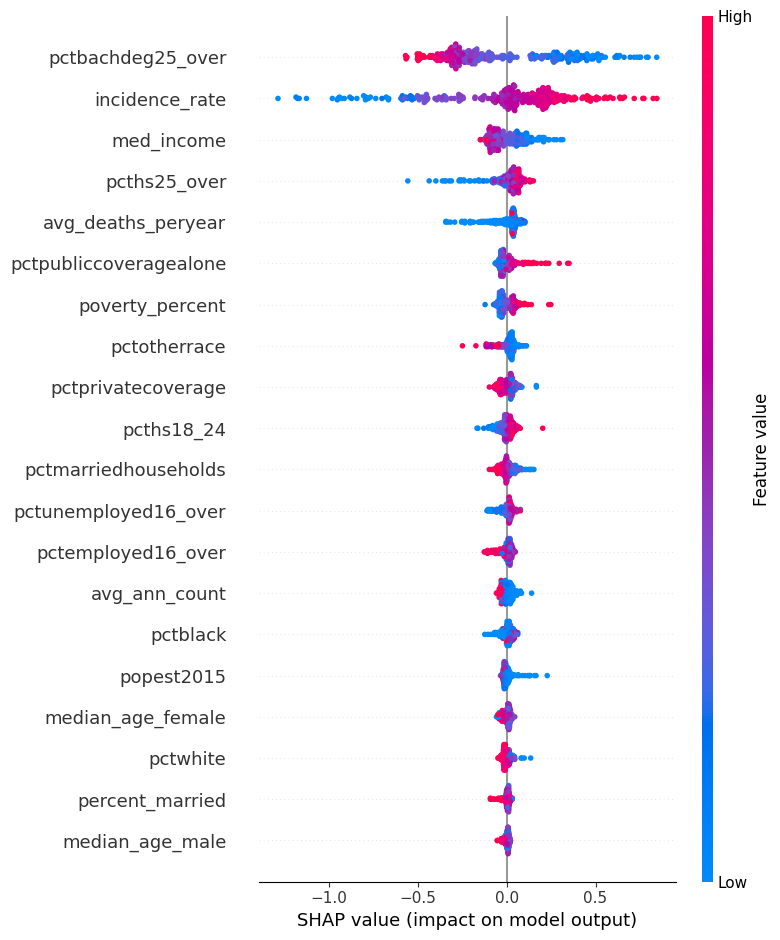

In [24]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

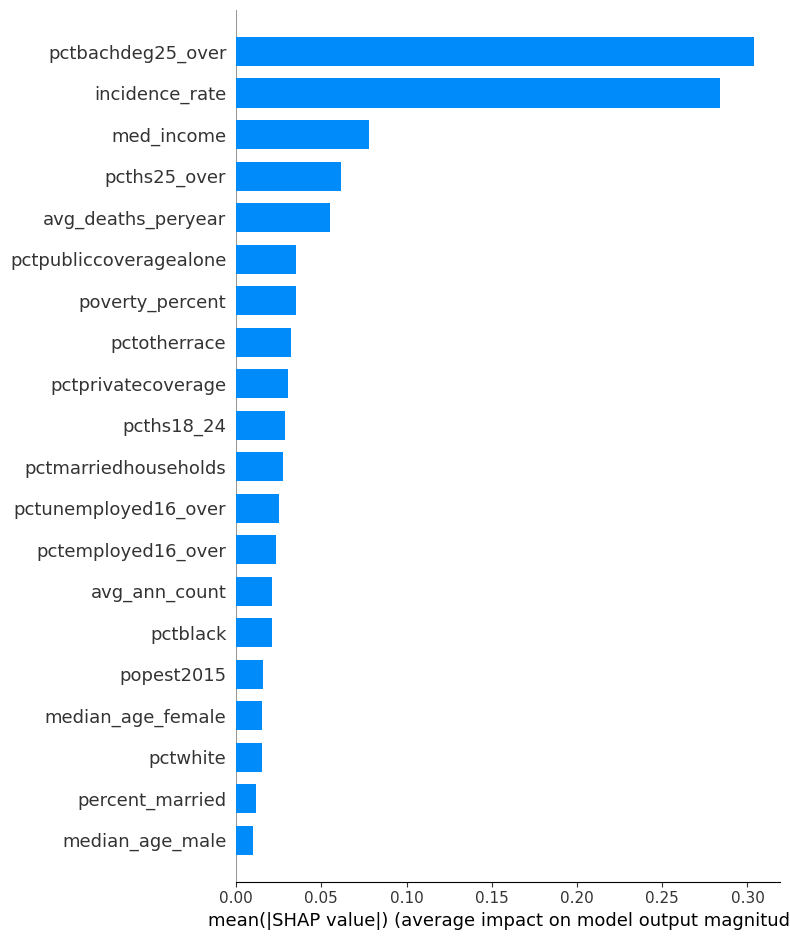

In [25]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [27]:
shap_values_df = pd.DataFrame(shap_values, columns=x_test.columns)

# Get summary statistics
summary_stats = shap_values_df.describe()
summary_stats

avg_ann_count  avg_deaths_peryear  incidence_rate  med_income  \
count     305.000000          305.000000      305.000000  305.000000   
mean        0.002574           -0.000143       -0.009281    0.005619   
std         0.027037            0.079011        0.386550    0.092834   
min        -0.058312           -0.343388       -1.288078   -0.149454   
25%        -0.016578           -0.013549       -0.135999   -0.071213   
50%        -0.000395            0.030726        0.046928   -0.017213   
75%         0.019163            0.040902        0.220048    0.072617   
max         0.140030            0.102819        0.845293    0.315873   

       popest2015  poverty_percent  study_percap   binnedinc  median_age  \
count  305.000000       305.000000    305.000000  305.000000  305.000000   
mean     0.001843         0.000697      0.000149    0.000350    0.000024   
std      0.028928         0.043792      0.003618    0.006460    0.010547   
min     -0.035116        -0.121927     -0.031034   -0.018491   -0.036638   
25%     -0.012977        -0.030854     -0.000723   -0.003374   -0.005865   
50%     -0.004759        -0.013726      0.000587   -0.000629    0.002908   
75%      0.006767         0.032577      0.001674    0.003021    0.007712   
max      0.227850         0.248661      0.009370    0.042709    0.021249   

       median_age_male  ...  pctprivatecoveragealone  pctempprivcoverage  \
count       305.000000  ...               305.000000          305.000000   
mean          0.001069  ...                 0.001053           -0.000366   
std           0.012586  ...                 0.006701            0.006571   
min          -0.053547  ...                -0.019398           -0.049749   
25%          -0.004974  ...                -0.003003           -0.002743   
50%           0.004789  ...                 0.000058           -0.000023   
75%           0.009009  ...                 0.004142            0.002674   
max           0.021146  ...                 0.028407            0.035970   

       pctpubliccoverage  pctpubliccoveragealone    pctwhite    pctblack  \
count         305.000000              305.000000  305.000000  305.000000   
mean            0.000991                0.004171   -0.001496    0.000478   
std             0.008736                0.058140    0.020945    0.027914   
min            -0.026601               -0.065809   -0.049112   -0.123729   
25%            -0.004058               -0.028299   -0.013734   -0.015038   
50%             0.000796               -0.012673   -0.005137    0.003782   
75%             0.005491                0.014445    0.009276    0.018327   
max             0.034036                0.351181    0.134960    0.062365   

         pctasian  pctotherrace  pctmarriedhouseholds   birthrate  
count  305.000000    305.000000            305.000000  305.000000  
mean    -0.001709      0.006963              0.003670   -0.000043  
std      0.011769      0.042964              0.038296    0.013645  
min     -0.054735     -0.249376             -0.098010   -0.095920  
25%     -0.007375      0.001260             -0.017208   -0.004794  
50%     -0.000505      0.018423             -0.000751    0.001700  
75%      0.005382      0.029470              0.021350    0.007552  
max      0.043239      0.111548              0.153152    0.047621  

[8 rows x 32 columns]

In [29]:
train_pred_rf = clf.predict(x_train)
val_pred_rf = clf.predict(x_test)

In [30]:
train_error_rf = mean_squared_error(y_train, train_pred_rf)
val_error_rf = mean_squared_error(y_test, val_pred_rf)

In [31]:
print(f"Training Error (RF): {train_error_rf}")
print(f"Validation Error (RF): {val_error_rf}")

Training Error (RF): 0.0642266665777669
Validation Error (RF): 0.478057956492855


In [32]:
if train_error_rf < val_error_rf:
    print("The model may be overfitting (training error is lower than validation error).")
elif train_error_rf > val_error_rf:
    print("The model may be underfitting (training error is higher than validation error).")
else:
    print("The model seems to fit well, with similar training and validation errors.")

The model may be overfitting (training error is lower than validation error).
